In [667]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

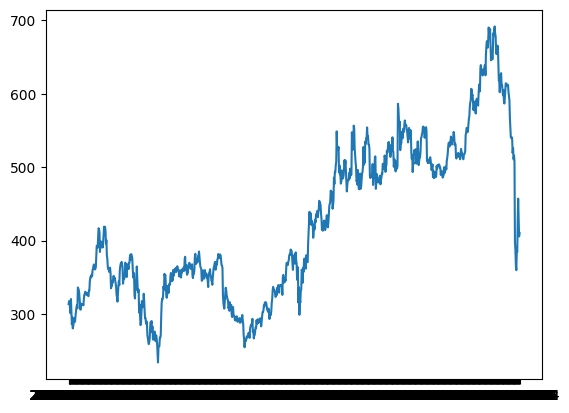

In [668]:
nflx = pd.read_csv("NFLX_2.csv")
nflx
close_prices = nflx['Close']
dates = nflx['Date']
plt.plot(dates, close_prices)

In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

nflx = nflx[['Date','Close','Day','Month']]
nflx

,Date,Close,Day,Month
0,2018-03-19,313.480011,19,3
1,2018-03-20,317.500000,20,3
2,2018-03-21,316.480011,21,3
3,2018-03-22,306.700012,22,3
4,2018-03-23,300.940002,23,3
...,...,...,...,...
975,2022-01-31,427.140015,31,1
976,2022-02-01,457.130005,1,2
977,2022-02-02,429.480011,2,2
978,2022-02-03,405.600006,3,2


In [670]:
device ='cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [671]:
from copy import deepcopy as dc

def prepare_dataframe_fro_lstm(df,n_steps):
    df = dc(df)
    df.set_index('Date',inplace = True)
    for i in range(1,n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace = True)
    return df

lookback = 7
nflx = prepare_dataframe_fro_lstm(nflx,lookback)
nflx

,Close,Day,Month,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,,,
2018-03-28,285.769989,28,3,300.690002,320.350006,300.940002,306.700012,316.480011,317.500000,313.480011
2018-03-29,295.350006,29,3,285.769989,300.690002,320.350006,300.940002,306.700012,316.480011,317.500000
2018-04-02,280.290009,2,4,295.350006,285.769989,300.690002,320.350006,300.940002,306.700012,316.480011
2018-04-03,283.670013,3,4,280.290009,295.350006,285.769989,300.690002,320.350006,300.940002,306.700012
2018-04-04,288.940002,4,4,283.670013,280.290009,295.350006,285.769989,300.690002,320.350006,300.940002
...,...,...,...,...,...,...,...,...,...,...
2022-01-31,427.140015,31,1,384.359985,386.700012,359.700012,366.420013,387.149994,397.500000,508.250000
2022-02-01,457.130005,1,2,427.140015,384.359985,386.700012,359.700012,366.420013,387.149994,397.500000
2022-02-02,429.480011,2,2,457.130005,427.140015,384.359985,386.700012,359.700012,366.420013,387.149994


In [672]:
nflx_mtx = nflx.to_numpy()
nflx_mtx

array([[285.769989,  28.      ,   3.      , ..., 316.480011, 317.5     ,
        313.480011],
       [295.350006,  29.      ,   3.      , ..., 306.700012, 316.480011,
        317.5     ],
       [280.290009,   2.      ,   4.      , ..., 300.940002, 306.700012,
        316.480011],
       ...,
       [429.480011,   2.      ,   2.      , ..., 359.700012, 366.420013,
        387.149994],
       [405.600006,   3.      ,   2.      , ..., 386.700012, 359.700012,
        366.420013],
       [410.170013,   4.      ,   2.      , ..., 384.359985, 386.700012,
        359.700012]])

In [673]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(-1,1))
nflx_mtx = scaler.fit_transform(nflx_mtx)

nflx_mtx

array([[-0.77331214,  0.8       , -0.63636364, ..., -0.63915158,
        -0.63469564, -0.65225746],
       [-0.73146064,  0.86666667, -0.63636364, ..., -0.68187673,
        -0.63915158, -0.63469564],
       [-0.79725212, -0.93333333, -0.45454545, ..., -0.70704005,
        -0.68187673, -0.63915158],
       ...,
       [-0.14549701, -0.93333333, -0.81818182, ..., -0.45033963,
        -0.42098246, -0.33042096],
       [-0.24981978, -0.86666667, -0.81818182, ..., -0.33238676,
        -0.45033963, -0.42098246],
       [-0.22985514, -0.8       , -0.81818182, ..., -0.34260946,
        -0.33238676, -0.45033963]])

In [674]:
X = nflx_mtx[:,1:]
y = nflx_mtx[:,0]

X.shape, y.shape

((973, 9), (973,))

In [675]:
X = dc(np.flip(X,axis=1))
X

array([[-0.65225746, -0.63469564, -0.63915158, ..., -0.70813221,
        -0.63636364,  0.8       ],
       [-0.63469564, -0.63915158, -0.68187673, ..., -0.77331214,
        -0.63636364,  0.86666667],
       [-0.63915158, -0.68187673, -0.70704005, ..., -0.73146064,
        -0.45454545, -0.93333333],
       ...,
       [-0.33042096, -0.42098246, -0.45033963, ..., -0.02470457,
        -0.81818182, -0.93333333],
       [-0.42098246, -0.45033963, -0.33238676, ..., -0.14549701,
        -0.81818182, -0.86666667],
       [-0.45033963, -0.33238676, -0.34260946, ..., -0.24981978,
        -0.81818182, -0.8       ]])

In [676]:
split_index = int(len(X)*0.95)

split_index

924

In [677]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((924, 9), (49, 9), (924,), (49,))

In [678]:
num_columns = X_train.shape[1]

X_train = X_train.reshape((-1,num_columns,1))
X_test = X_test.reshape(-1,num_columns,1)

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((924, 9, 1), (49, 9, 1), (924, 1), (49, 1))

In [679]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

(torch.Size([924, 9, 1]),
 torch.Size([49, 9, 1]),
 torch.Size([924, 1]),
 torch.Size([49, 1]))

In [680]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self,i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [681]:
from torch.utils.data import DataLoader

batch_size = 16
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=False)

In [682]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [683]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [684]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [685]:
learning_rate = 0.001
num_epochs = 20
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1



Val Loss: 0.217
***************************************************

Epoch: 2

Val Loss: 0.189
***************************************************

Epoch: 3

Val Loss: 0.162
***************************************************

Epoch: 4

Val Loss: 0.093
***************************************************

Epoch: 5

Val Loss: 0.029
***************************************************

Epoch: 6

Val Loss: 0.025
***************************************************

Epoch: 7

Val Loss: 0.023
***************************************************

Epoch: 8

Val Loss: 0.022
***************************************************

Epoch: 9

Val Loss: 0.021
***************************************************

Epoch: 10

Val Loss: 0.020
***************************************************

Epoch: 11

Val Loss: 0.019
***************************************************

Epoch: 12

Val Loss: 0.018
***************************************************

Epoch: 13

Val Loss: 0.018
********************************

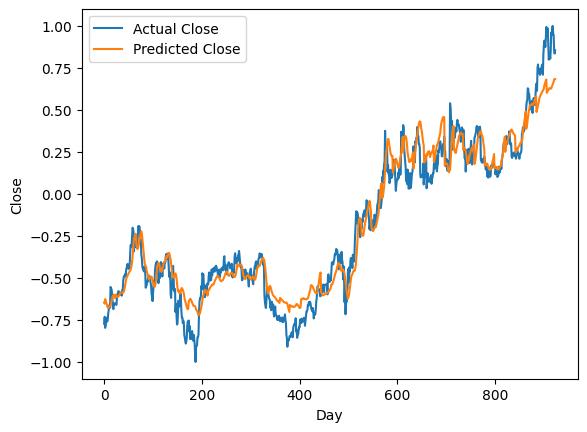

In [686]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [687]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], num_columns+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([314.90704706, 313.22265159, 319.53742571, 316.96406838,
       314.97002684, 313.16765343, 310.48649642, 308.14291435,
       307.82665104, 307.42729698, 308.3325359 , 309.3723982 ,
       309.75566622, 310.68063407, 313.51355107, 316.71580577,
       319.63817153, 322.21856906, 324.1384429 , 325.10842165,
       325.5019498 , 323.035287  , 320.86922442, 325.5910984 ,
       323.74541956, 322.85360614, 322.85319683, 322.37687809,
       322.61110122, 323.27034241, 324.27760967, 325.47703622,
       326.33902429, 327.93927844, 328.5627865 , 328.66279557,
       328.48148309, 327.90198993, 327.91365538, 328.31426467,
       329.47200941, 331.54508949, 334.95915055, 338.48766947,
       342.75157562, 346.79044092, 348.67365385, 350.07686422,
       351.45885848, 353.06553886, 354.67520723, 355.86453737,
       357.34478064, 357.86441845, 359.33385583, 361.71966547,
       365.21785422, 369.89331199, 376.79820779, 385.61449098,
       394.50760242, 402.16620908, 403.86151959, 406.92

In [688]:
dummies = np.zeros((X_train.shape[0], num_columns+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([285.76998664, 295.35000888, 280.29000849, 283.67001463,
       288.94000103, 293.97000662, 288.85000652, 289.92999524,
       298.07000979, 303.67001245, 309.24999966, 311.64999885,
       307.78000288, 336.06000065, 334.51998388, 332.70000996,
       327.76998615, 318.68999557, 307.01998858, 305.76001084,
       313.98000534, 311.76000882, 312.45999039, 313.29998465,
       313.35999009, 311.69000248, 320.08999965, 326.26001304,
       326.89001556, 330.29998348, 329.60000191, 326.45999023,
       328.53000045, 326.13000126, 328.18999693, 325.22000065,
       324.17998827, 331.82001208, 331.61999395, 344.72000774,
       349.29000575, 351.29000962, 349.73001151, 353.54000887,
       351.60000361, 359.92999444, 361.81000108, 365.79998746,
       367.45001419, 361.39999121, 360.57000468, 361.45000939,
       363.8299863 , 379.92999226, 392.86999836, 391.98001322,
       390.39999283, 404.98001112, 416.76001102, 415.44000055,
       411.08999519, 384.48000892, 399.39001618, 390.39

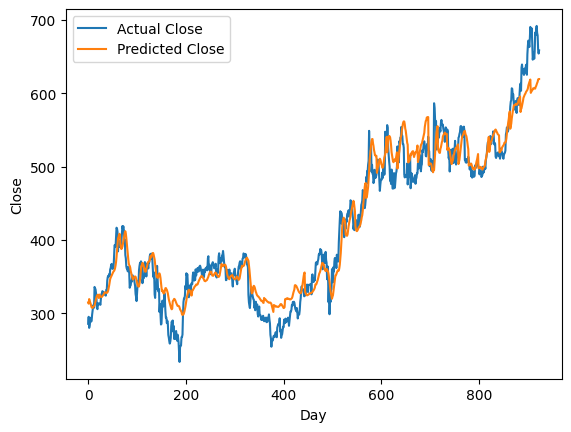

In [689]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [690]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], num_columns+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([620.29002602, 622.06194647, 622.10563392, 599.96589241,
       598.6503844 , 597.9007121 , 598.20892557, 597.11843112,
       596.18231628, 595.42661342, 594.88079316, 597.10170382,
       597.51556124, 598.13658613, 598.52038626, 597.63546296,
       598.21569289, 598.15660159, 598.65419102, 599.98597609,
       604.24966394, 605.624618  , 607.5709608 , 609.60361429,
       611.27679456, 558.961024  , 558.63318392, 557.89529987,
       555.523748  , 552.10652839, 549.20556976, 543.90927128,
       538.90102756, 533.54033717, 526.91767021, 526.15023369,
       522.43171802, 520.28876804, 517.22586771, 504.20921073,
       485.90836756, 464.50957996, 437.91276337, 413.52864386,
       389.22353561, 367.02134643, 371.47161326, 377.36127382,
       385.42949468])

In [691]:
dummies = np.zeros((X_test.shape[0], num_columns+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([665.64001531, 663.84002956, 641.90001966, 617.77001595,
       616.46996636, 602.13000393, 612.69000583, 625.58001423,
       628.08002249, 611.00000276, 611.65996707, 604.5599922 ,
       597.98998349, 605.03998112, 591.05999674, 586.72998637,
       593.73999402, 604.91998389, 614.23999622, 614.09002355,
       613.11999023, 610.71001741, 610.53997472, 612.09003332,
       602.44000473, 597.36999552, 591.15001854, 567.52001921,
       553.28997806, 541.05999536, 539.84997439, 540.84003   ,
       537.219968  , 519.20001318, 525.69000099, 510.79998871,
       515.85998337, 508.2499998 , 397.50000181, 387.14999165,
       366.42001636, 359.70001452, 386.70001226, 384.3599844 ,
       427.14001367, 457.13000481, 429.48001084, 405.60000591,
       410.17001415])

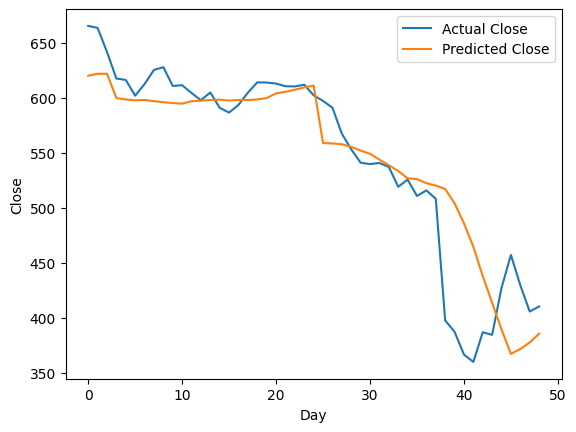

In [692]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
